http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html 
http://systems-sciences.uni-graz.at/etextbook/sw2/ph_plane_analysis.html

In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# X[0] = x and X[1] = y
# Equation in np array
def System(X,t=0):
    return np.array([2*X[0]-X[0]**2-X[0]*X[1], -X[1] + X[0]*X[1]])

In [120]:
# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(start=0,stop=20,num=1000)

In [121]:
# Initial values for x and y
System_start_values = np.array([10,2]) #Predator = 10, prey = 2 #change these values and plot

In [122]:
X,infodict = odeint(System, System_start_values, t, full_output=True)
#X
#infodict['message'] only showed when full_output=True specified in odeint

In [123]:
x,y = X.T #Transpose
#x
#y

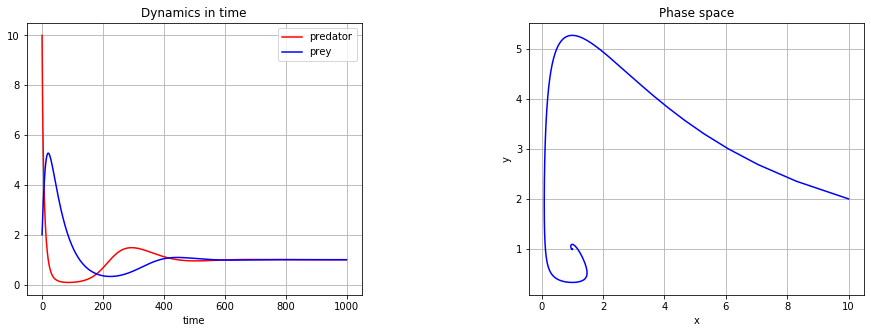

In [70]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace=0.5,hspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x,'r-',label='predator')
ax1.plot(y,'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

In [99]:
# Equilibrium points / fixed points
import sympy as sm

r, c = sm.symbols('r, c', negative=False)
R = 2*r - r**2 - r*c
C = -c + c * r

Requal = sm.Eq(R,0)
Cequal = sm.Eq(C,0)

equilibria = sm.solve((Requal,Cequal),r,c)
equilibria

[(0, 0), (1, 1), (2, 0)]

# Without library odeint

In [107]:
# define system in terms of separated differential equations
def f(x,y):
    return 2*x - x**2 - x*y
def g(x,y):
    return - y + x*y

In [108]:
#Define lists to store the values of x and y over time to be entered into f(x,y) and g(x,y)
x = []
y = []

In [109]:
def System(init_x,init_y,time_interval,until_time):
    x.append(init_x)
    y.append(init_y)
    for i in range(until_time):
        x.append(x[i] + (f(x[i],y[i])) * time_interval) #Euler
        y.append(y[i] + (g(x[i],y[i])) * time_interval) #Euler
    return x, y

In [88]:
x1,y1 = System(10,2,0.01,1000)
#x1
#y1

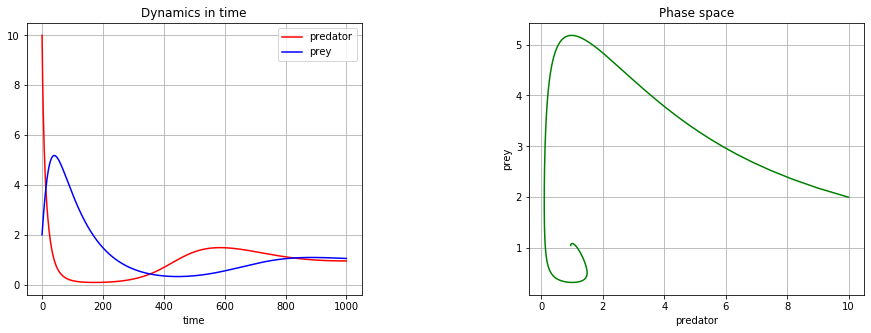

In [76]:
fig = plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.5,hspace=0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x,'r-',label='predator')
ax1.plot(y,'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="green")
ax2.set_xlabel("predator")
ax2.set_ylabel("prey")  
ax2.set_title("Phase space")
ax2.grid()

In [92]:
# Equilibrium points
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

The system has a fixed point in 0,0
The system has a fixed point in 1,1
The system has a fixed point in 2,0


[(0, 0), (1, 1), (2, 0)]

# Quiver Plots

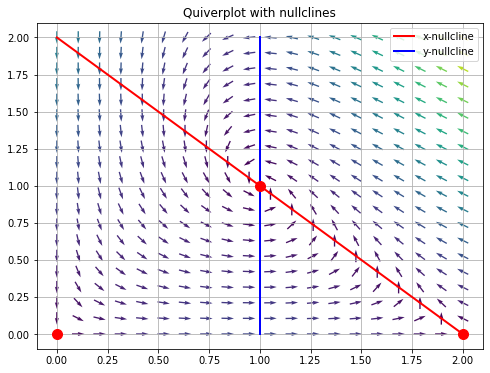

In [200]:

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,2,20)
y = np.arange(0,2,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = System([X1, Y1])                     # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid', animated=True)
ax4.legend()
ax4.grid()

In [136]:
# needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt

def eigenvalues(x,y):
    # 2*x - x**2 - x*y
    a11 = 2 - 2*x - y                # differentiated with respect to x
    a12 = - x                        # differentiated with respect to y
    # - y + x*y
    a21 = y                          # differentiated with respect to x
    a22 = - 1 + x                    # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (x,y)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (x,y))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (x,y))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (x,y))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print('----------------------------')
    return lambda1 , lambda2

# iterate through list of fixed points
for x,y in fp:
    eigenvalues(x,y)    

Check the fixed point  0, 0
The real part of the first eigenvalue is -1.0
The real part of the second eigenvalue is 2.0
The fixed point in 0, 0 is unstable
----------------------------
Check the fixed point  1, 1
The real part of the first eigenvalue is -0.5
The real part of the second eigenvalue is -0.5
The fixed point in 1, 1 is a sink. It is stable
----------------------------
Check the fixed point  2, 0
The real part of the first eigenvalue is -2.0
The real part of the second eigenvalue is 1.0
The fixed point in 2, 0 is unstable
----------------------------


In [199]:
# here again, in order to avoid interference x = r (for resource) and y = c (for consumer) (see above) 

# put equations into matrix-form and compute Jacobian-matrix  
eqMat = sm.Matrix([ R, C ])
Mat = sm.Matrix([ r, c ])
jacMat = eqMat.jacobian(Mat)
print('Jacobian %s' % jacMat)
print(eqMat)
print('---------------------')

# iterate through list of equilibria
for item in equilibria:
    eqmat = jacMat.subs([ (r, item[0]), (c, item[1]) ])
    #print(eqmat,list(eqmat.eigenvals().keys())[0])
    print('The eigenvalues for the fixed point (%s, %s) are %s and %s:' 
          %(item[0], item[1], list(eqmat.eigenvals().keys())[0], list(eqmat.eigenvals().keys())[1]))
    print('-------------------------------------------')

Jacobian Matrix([[-c - 2*r + 2, -r], [c, r - 1]])
Matrix([[-c*r - r**2 + 2*r], [c*r - c]])
---------------------
The eigenvalues for the fixed point (0, 0) are 2 and -1:
-------------------------------------------
The eigenvalues for the fixed point (1, 1) are -1/2 - sqrt(3)*I/2 and -1/2 + sqrt(3)*I/2:
-------------------------------------------
The eigenvalues for the fixed point (2, 0) are -2 and 1:
-------------------------------------------
